In [43]:
!pip install missingno

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [53]:
data=pd.read_csv('spaceship_titanic.csv')

In [55]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7699.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.798805,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.557353,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8292 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         1892 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           7699 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [59]:
data.isnull().sum()

PassengerId        0
HomePlanet       401
CryoSleep        217
Cabin           6801
Destination      182
Age              994
VIP              203
RoomService      181
FoodCourt        183
ShoppingMall     208
Spa              183
VRDeck           188
Name             200
Transported        0
dtype: int64

In [61]:
#za vo procent
missing_percent=data.isnull().sum() / len(data)*100

In [63]:
missing_percent=missing_percent.reset_index().rename(columns={"index": "column", 0:"percent missing"})

In [65]:
missing_percent

,column,percent missing
0,PassengerId,0.000000
1,HomePlanet,4.612907
2,CryoSleep,2.496261
3,Cabin,78.235362
4,Destination,2.093639
5,Age,11.434488
6,VIP,2.335212
7,RoomService,2.082135
8,FoodCourt,2.105142
9,ShoppingMall,2.392730


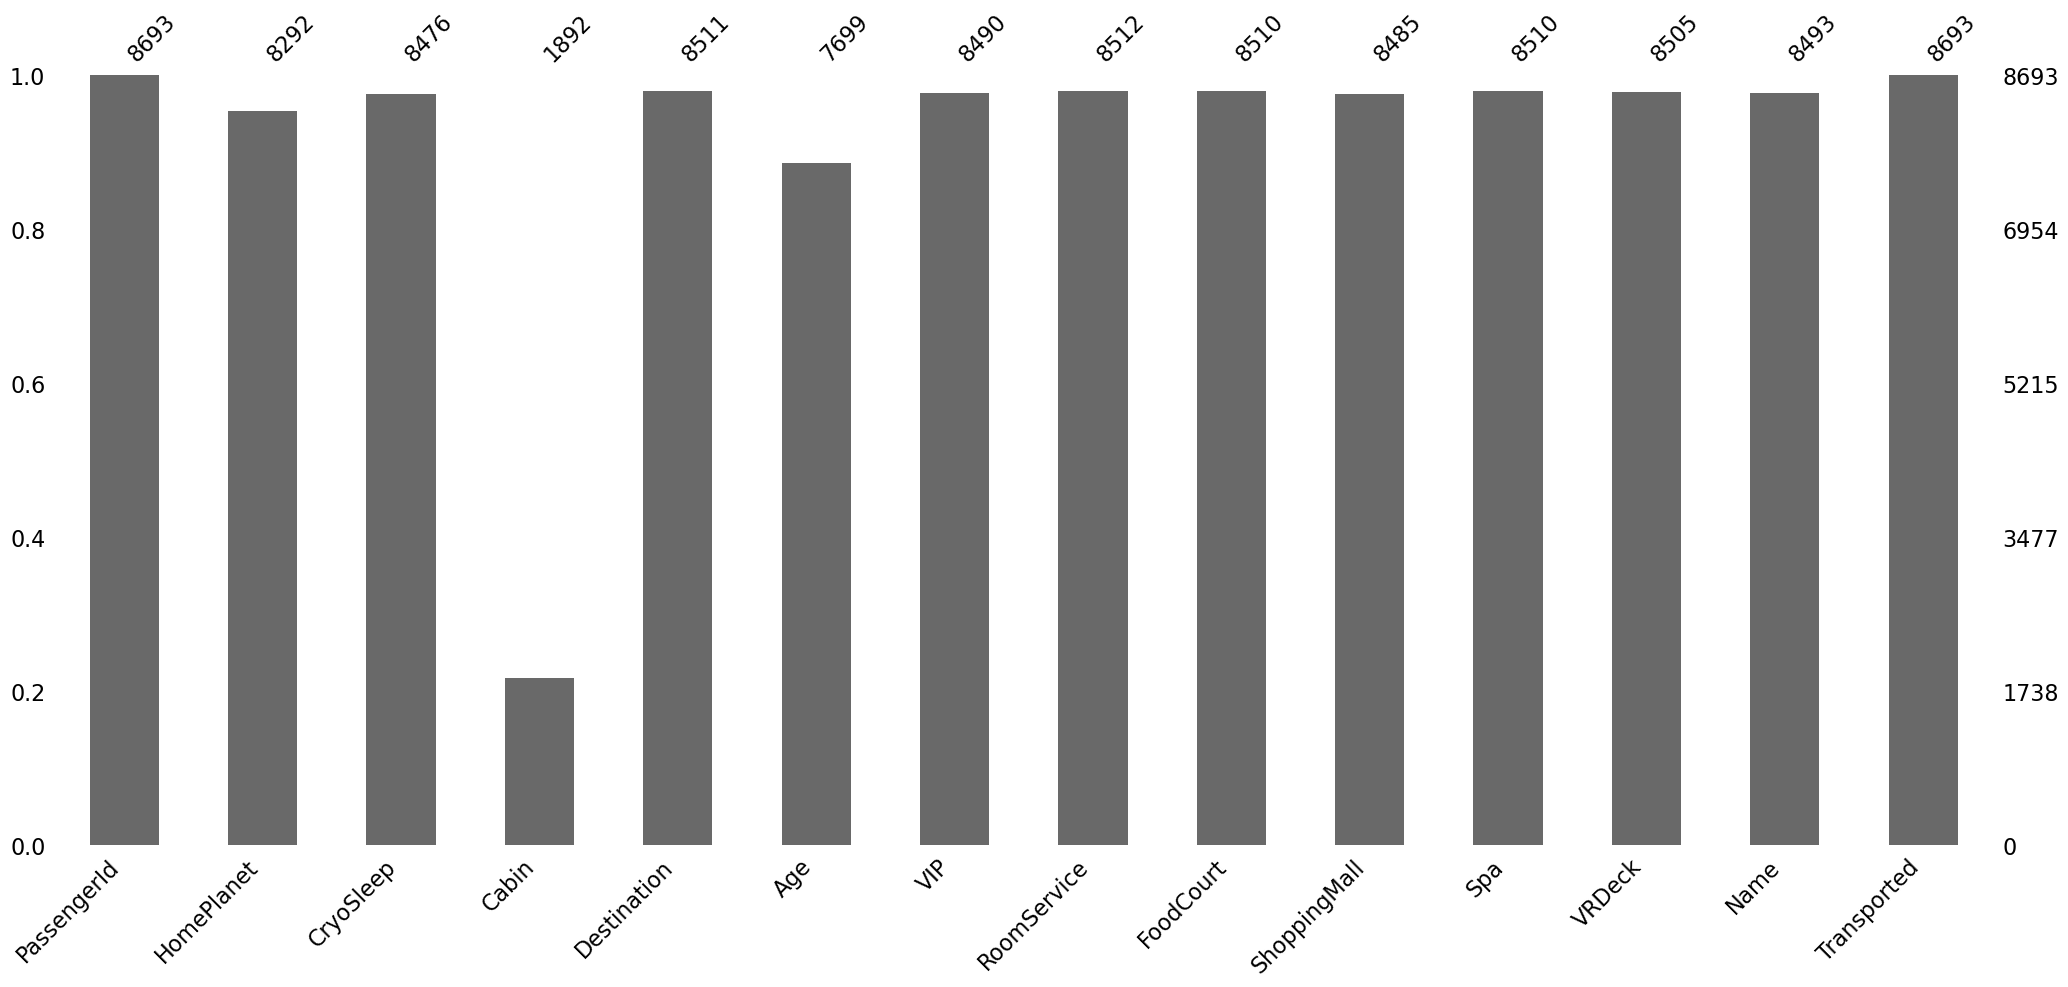

In [67]:
msno.bar(data)
plt.show()

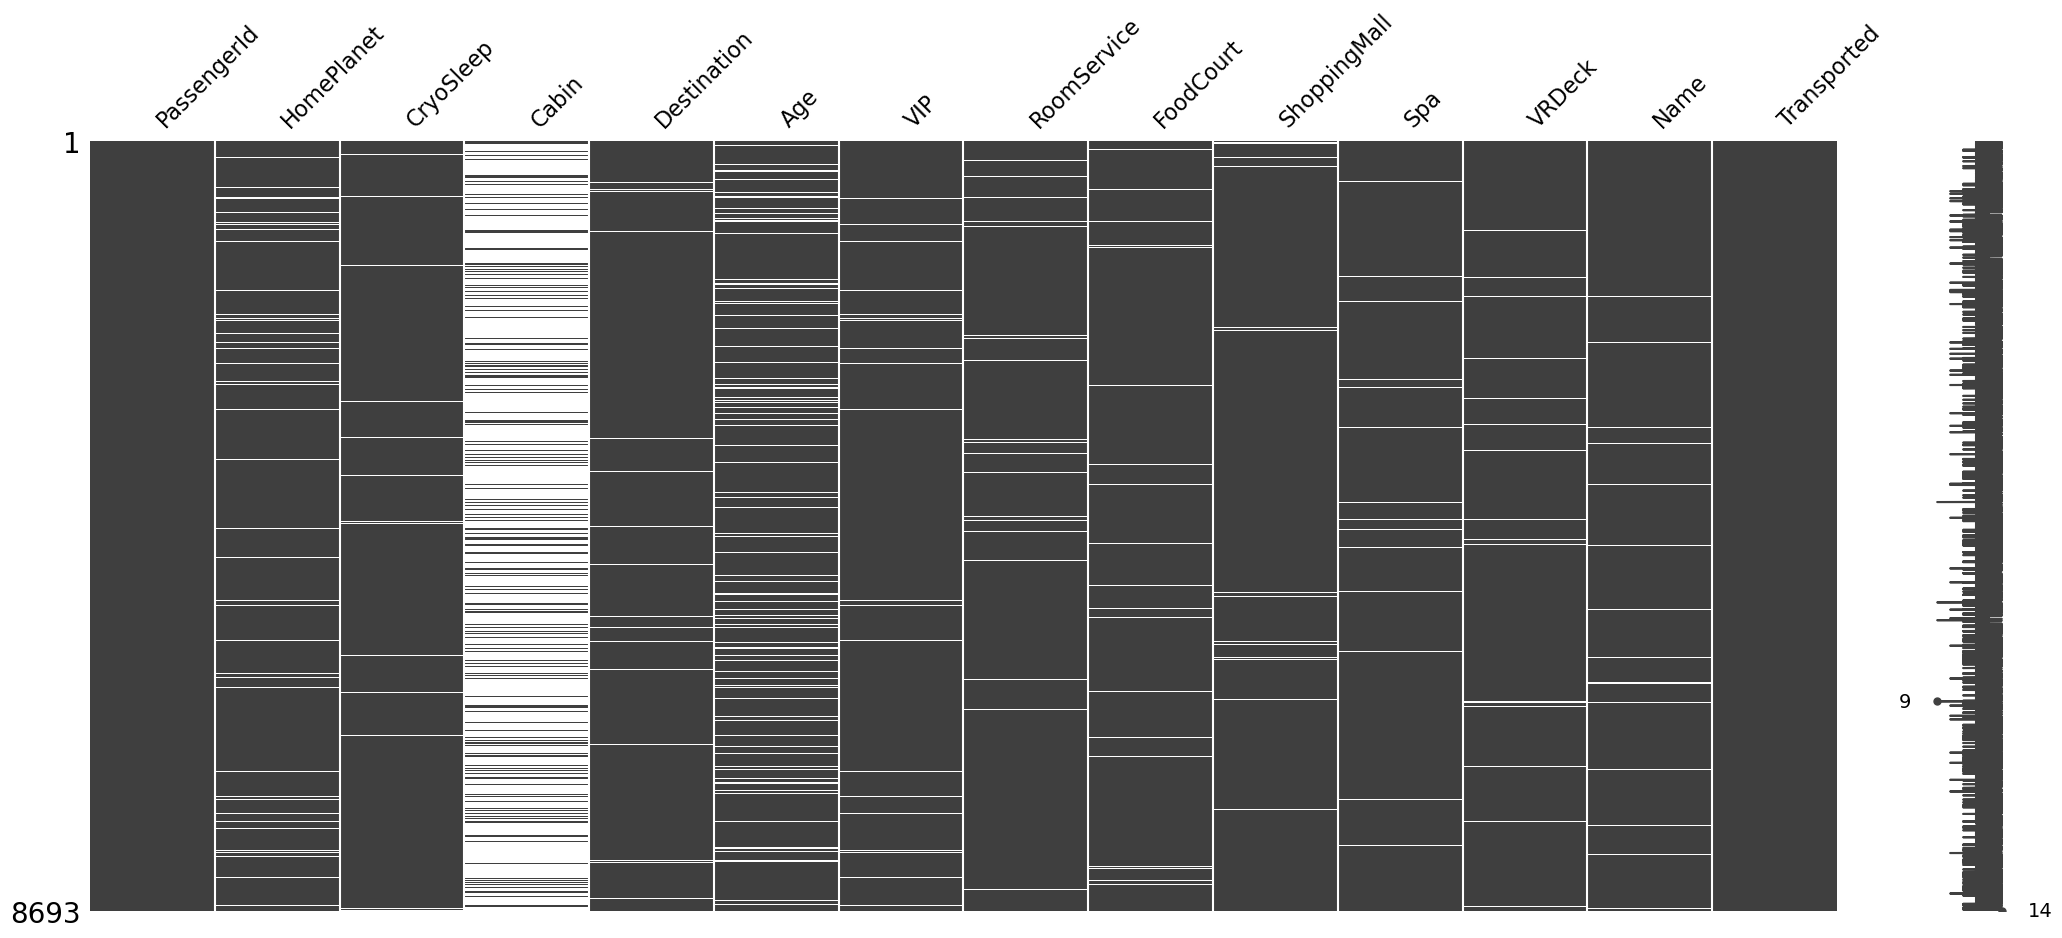

In [69]:
msno.matrix(data)
plt.show()

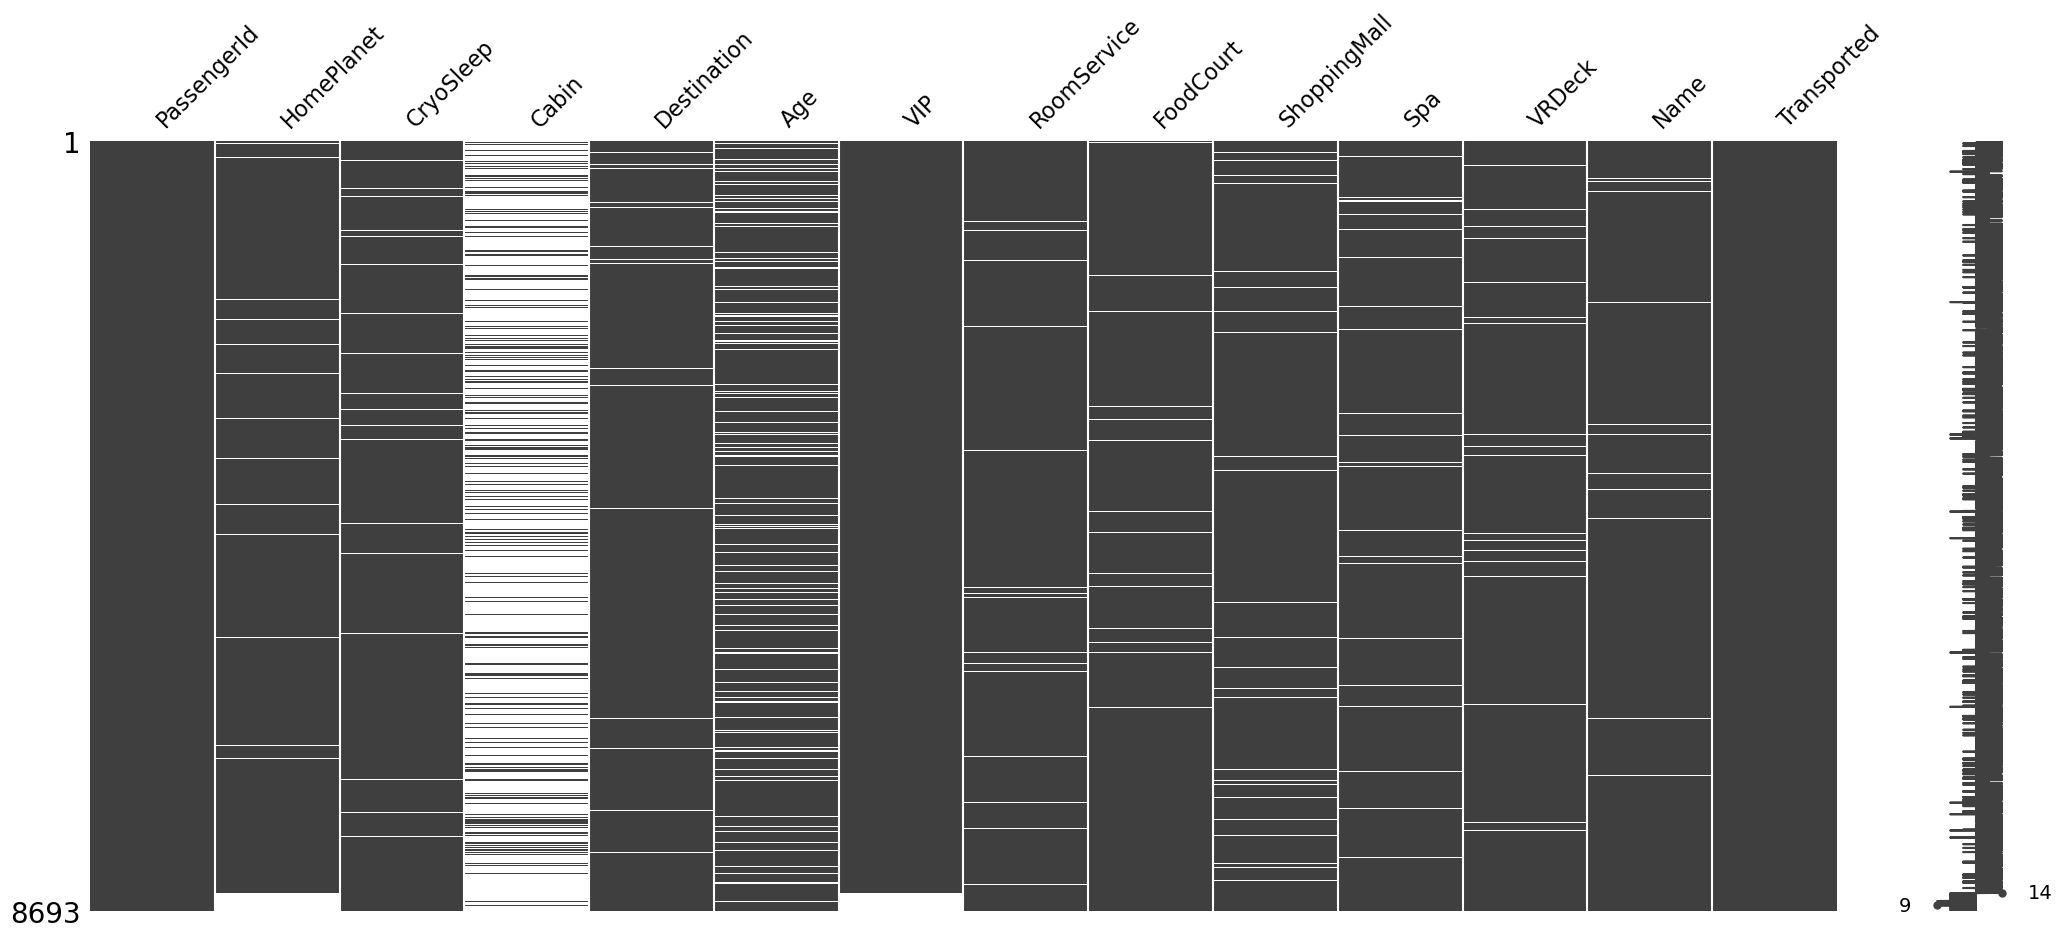

In [71]:
msno.matrix(data.sort_values('VIP'))
plt.show()

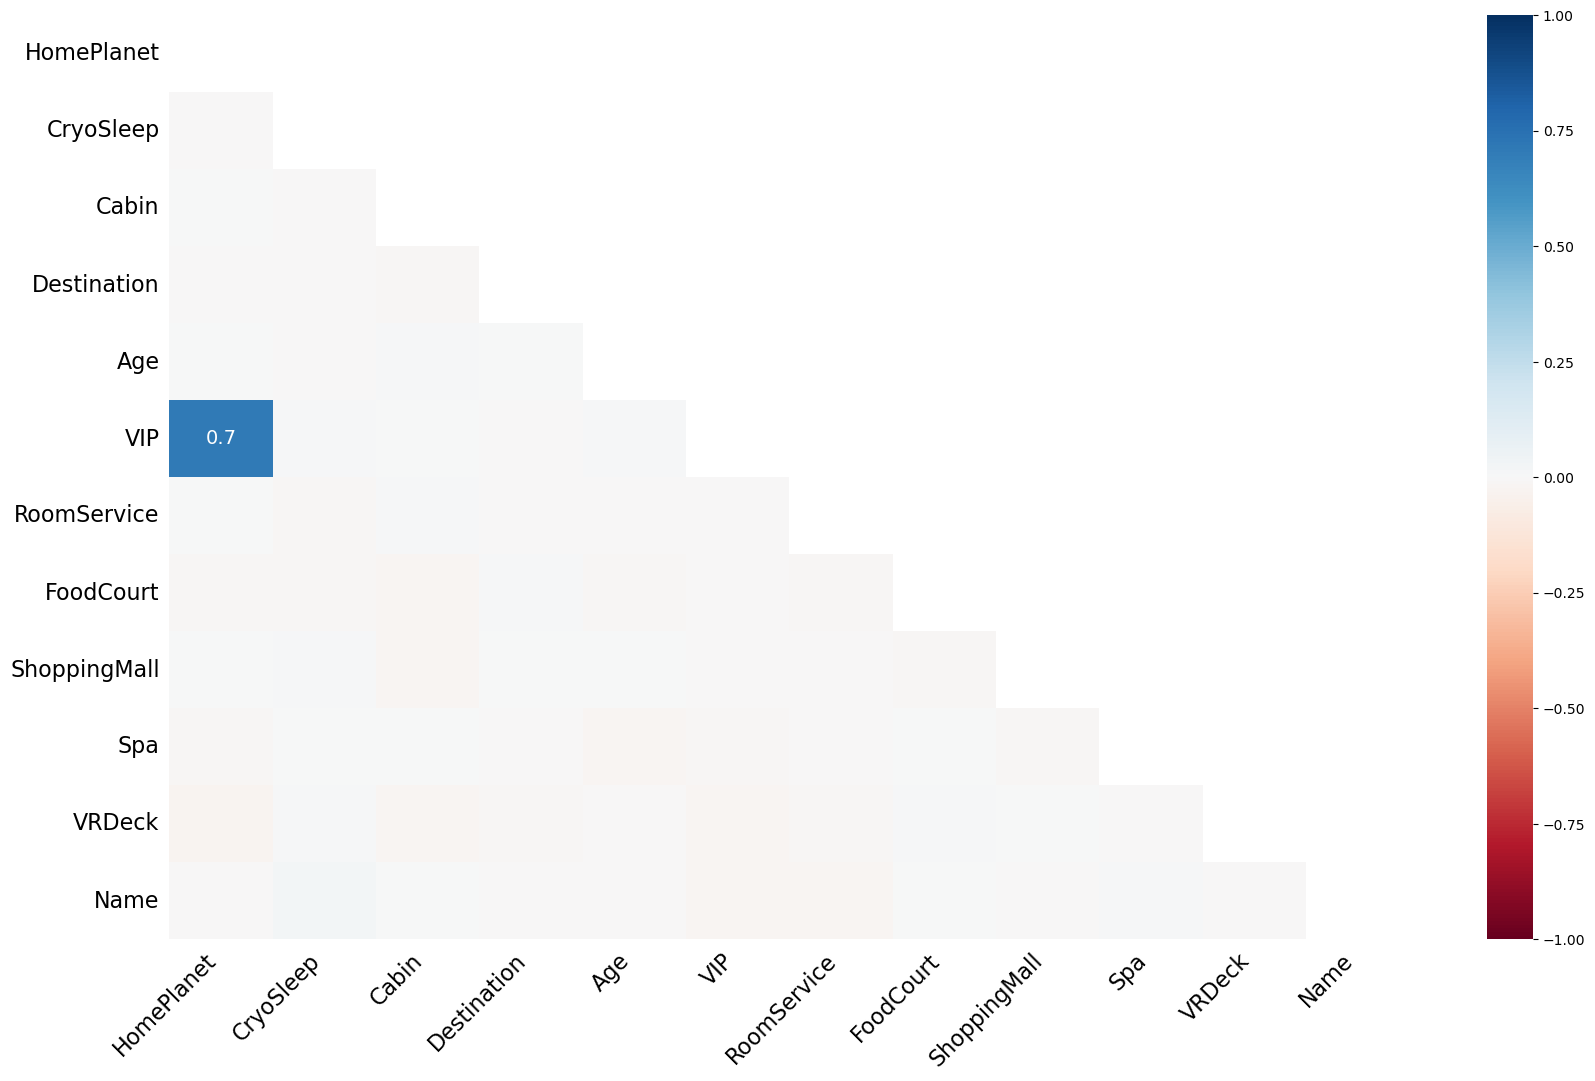

In [73]:
msno.heatmap(data)
plt.show()

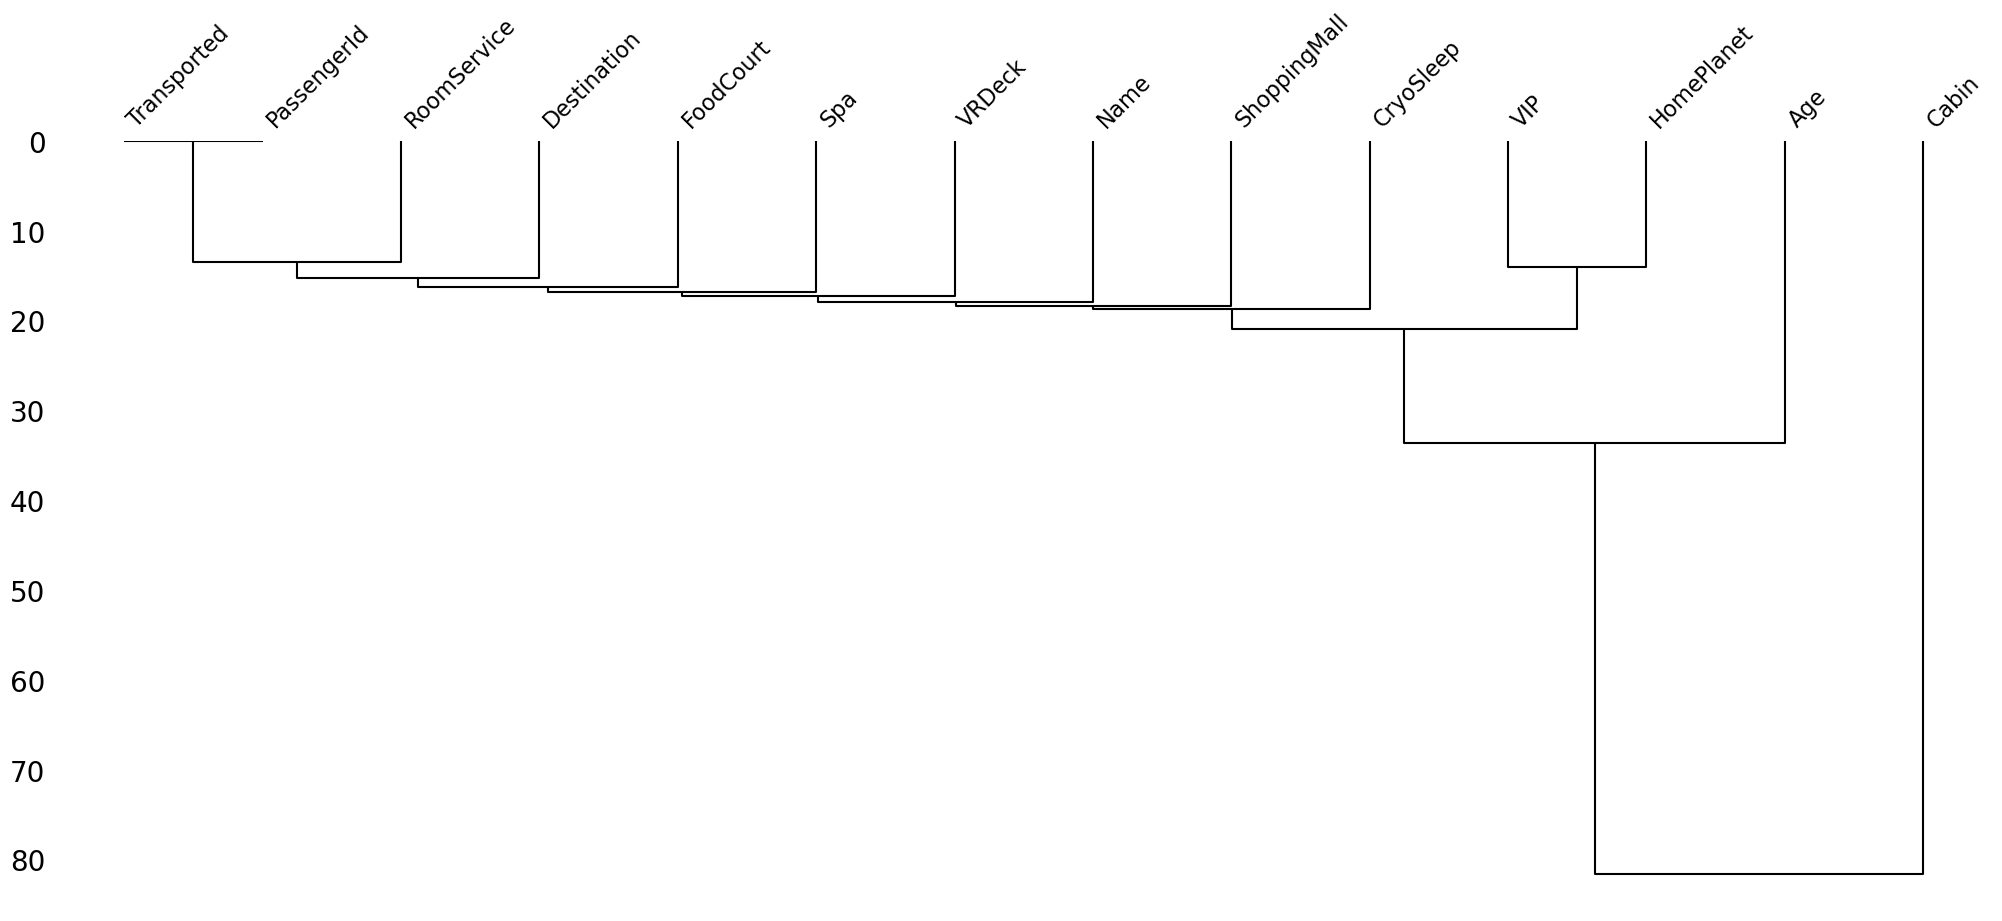

In [77]:
msno.dendrogram(data)
plt.show()

In [79]:
data=data.dropna(subset=['RoomService'], axis=0)
#po x oska dropnuvame redica

In [81]:
data.isnull().sum()

PassengerId        0
HomePlanet       391
CryoSleep        215
Cabin           6655
Destination      179
Age              974
VIP              199
RoomService        0
FoodCourt        181
ShoppingMall     204
Spa              180
VRDeck           186
Name             199
Transported        0
dtype: int64

In [85]:
data=data.drop(columns='Cabin')

In [87]:
data.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt       181
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [89]:
constant_imputer=SimpleImputer(strategy='constant', fill_value=0)

In [99]:
data['FoodCourt']=constant_imputer.fit_transform([data['FoodCourt']])[0]

In [101]:
data.isnull().sum()

PassengerId       0
HomePlanet      391
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [103]:
mostFrequent_imputer=SimpleImputer(strategy='most_frequent')

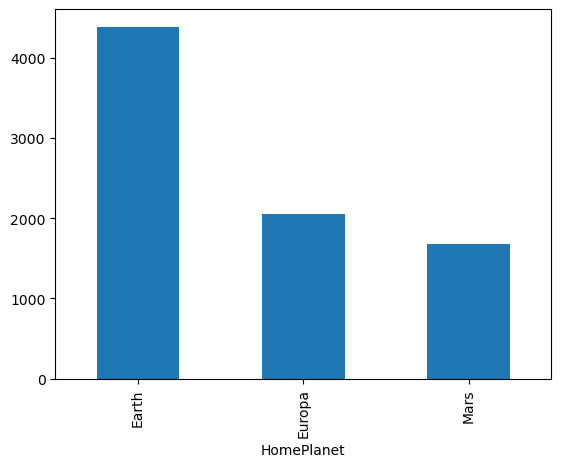

In [105]:
data['HomePlanet'].value_counts().plot.bar()
plt.show()

In [109]:
data['HomePlanet']=data['HomePlanet'].astype(str) 
#Simple imputer with most_frequent works with numbers (integers) and strings

In [125]:
data['HomePlanet']=mostFrequent_imputer.fit_transform(data['HomePlanet'].values.reshape(1, -1))[0]
# a moze i fit_transform([data['HomePlanet']])[0] bidejki simple imputer raboti na 2D niza

In [127]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age             974
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8512 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8512 non-null   object 
 1   HomePlanet    8512 non-null   object 
 2   CryoSleep     8297 non-null   object 
 3   Destination   8333 non-null   object 
 4   Age           7538 non-null   float64
 5   VIP           8313 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8512 non-null   float64
 8   ShoppingMall  8308 non-null   float64
 9   Spa           8332 non-null   float64
 10  VRDeck        8326 non-null   float64
 11  Name          8313 non-null   object 
 12  Transported   8512 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 872.8+ KB


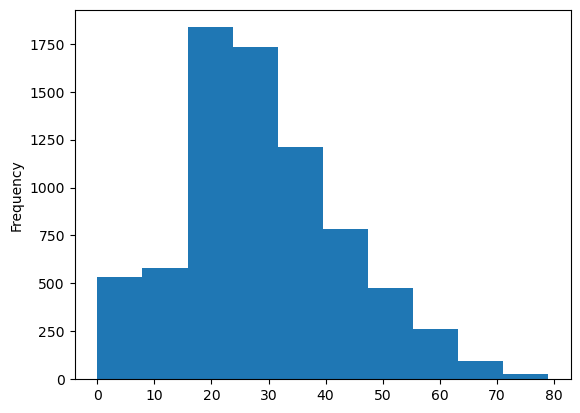

In [131]:
data.Age.plot.hist()
plt.show()

In [133]:
data.Age=data.Age.fillna(data.Age.mean())# tamu kaj sto ima missing value stavi prosek

In [135]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall    204
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

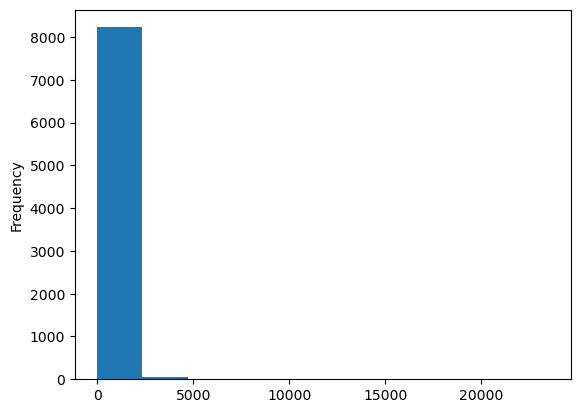

In [137]:
data.ShoppingMall.plot.hist()

In [139]:
data.ShoppingMall=data.ShoppingMall.fillna(data.ShoppingMall.median())

In [141]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa             180
VRDeck          186
Name            199
Transported       0
dtype: int64

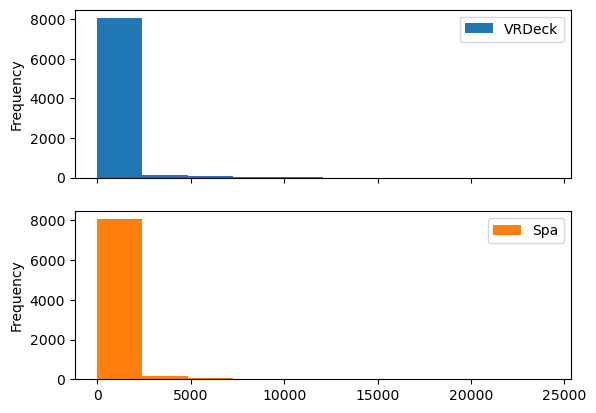

In [143]:
data[['VRDeck', 'Spa']].plot.hist(subplots=True)
plt.show()

In [145]:
scaler=MinMaxScaler()
scaled_Data=scaler.fit_transform(data[['VRDeck', 'Spa']])
knn_imputer=KNNImputer(n_neighbors=5)
imputed_data=knn_imputer.fit_transform(scaled_Data)

In [147]:
imputed_data

array([[0.00000000e+00, 0.00000000e+00],
       [1.82322960e-03, 2.45001785e-02],
       [2.03041478e-03, 2.99669761e-01],
       ...,
       [0.00000000e+00, 4.46269190e-05],
       [1.34048813e-01, 1.57533024e-02],
       [4.97244437e-04, 0.00000000e+00]])

In [149]:
imputed_data=scaler.inverse_transform(imputed_data)

In [151]:
imputed_data

array([[0.000e+00, 0.000e+00],
       [4.400e+01, 5.490e+02],
       [4.900e+01, 6.715e+03],
       ...,
       [0.000e+00, 1.000e+00],
       [3.235e+03, 3.530e+02],
       [1.200e+01, 0.000e+00]])

In [157]:
data[['VRDeck', 'Spa']]=imputed_data

In [161]:
data.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       215
Destination     179
Age               0
VIP             199
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            199
Transported       0
dtype: int64

In [163]:
#MICE

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


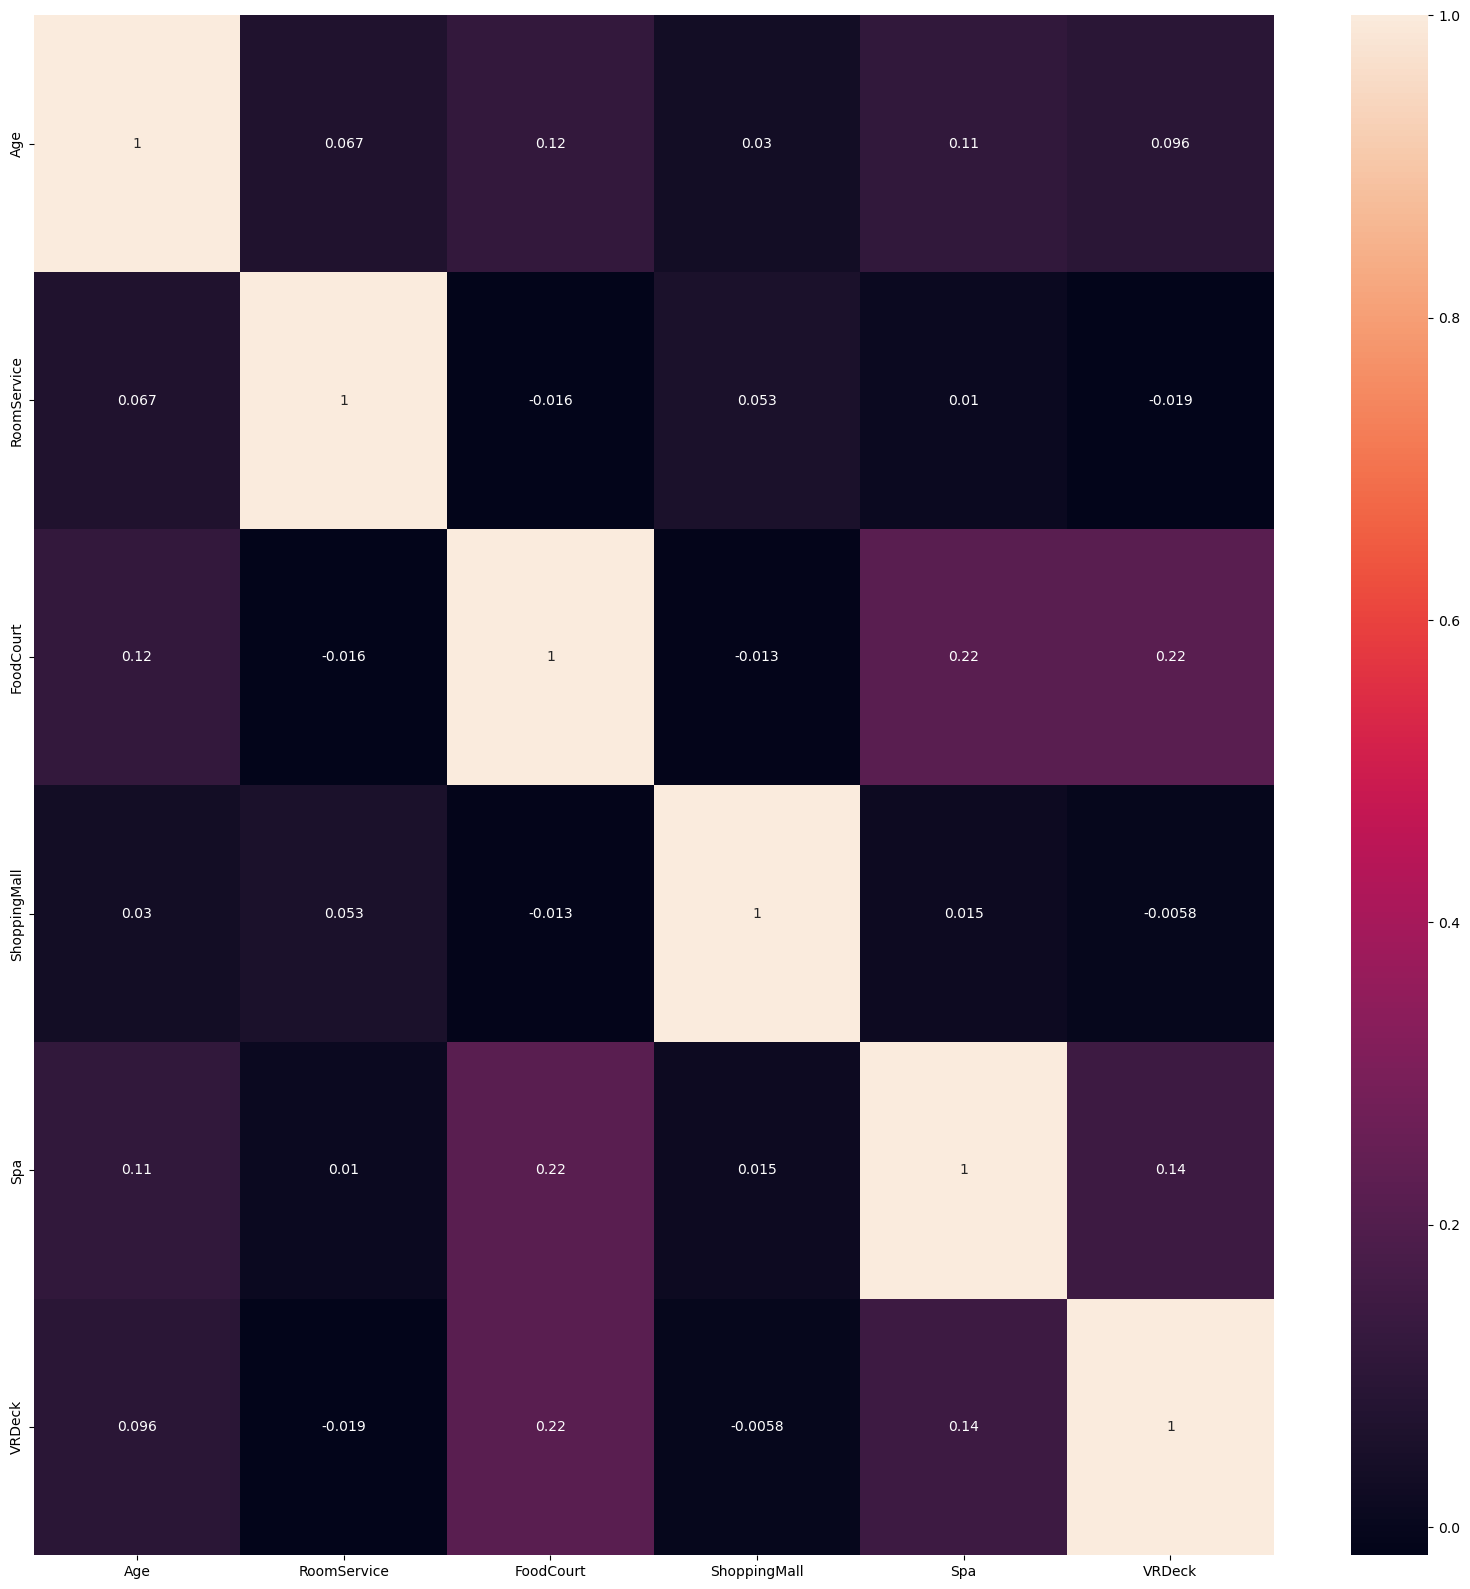

In [165]:
plt.figure(figsize=(20, 20))
sns.heatmap(data[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].corr(), annot=True)
plt.show()


In [167]:
mice=IterativeImputer()
imputed_values=mice.fit_transform(data[['VRDeck', 'FoodCourt', 'Spa']])
data[['VRDeck', 'FoodCourt', 'Spa']]=imputed_values

In [ ]:
#bfill() koga falat na pocetok i gi poplnuva so prvata vrednost sto ne e null nanazad
#ffill() za na krajot